In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import RepeatedKFold, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

sns.set_theme()

In [2]:
# Carregar dados
data = pd.read_csv("../data/cleaned.csv", parse_dates=["data"])

# Criar features temporais otimizadas
data['data'] = pd.to_datetime(data['data'])
data['dia_semana'] = data['data'].dt.dayofweek 
data['fim_de_semana'] = data['dia_semana'].isin([5,6]).astype(int)

# Definir target e features (versão simplificada)
y = data["pontuacao"]

num_cols = [
    "regularidade", "duracao", "sono_leve_perc", "sono_profundo_perc", "REM_perc",
    "tempo_acordado", "vezes_acordado", "dia_semana", "fim_de_semana"
]

X = data[num_cols]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, 
)

### Lasso

In [13]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Métricas de avaliação
mae_test = mean_absolute_error(y_test, y_pred_lasso)
mse_test = mean_squared_error(y_test, y_pred_lasso)
mape_test = mean_absolute_percentage_error(y_test, y_pred_lasso)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_lasso)

print("\n=== AVALIAÇÃO LASSO ===")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")


=== AVALIAÇÃO LASSO ===
MAE: 3.7763
MSE: 20.8802
MAPE: 0.0494
RMSE: 4.5695
R²: 0.6992


### Ridge

In [14]:
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Métricas de avaliação
mae_test = mean_absolute_error(y_test, y_pred_ridge)
mse_test = mean_squared_error(y_test, y_pred_ridge)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ridge)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_ridge)

print("\n=== AVALIAÇÃO RIDGE ===")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")


=== AVALIAÇÃO RIDGE ===
MAE: 3.7912
MSE: 21.3630
MAPE: 0.0497
RMSE: 4.6220
R²: 0.6923


### Hist Gradient Boosting Regressor

In [16]:
hgb_model = HistGradientBoostingRegressor(random_state=42)

# Treinar melhor modelo
hgb_model.fit(X_train, y_train)
y_pred_hgb = hgb_model.predict(X_test)

# Métricas de avaliação
mae_test = mean_absolute_error(y_test, y_pred_hgb)
mse_test = mean_squared_error(y_test, y_pred_hgb)
mape_test = mean_absolute_percentage_error(y_test, y_pred_hgb)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_hgb)

print("\n=== AVALIAÇÃO HGB ===")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")


=== AVALIAÇÃO HGB ===
MAE: 3.5909
MSE: 17.3536
MAPE: 0.0474
RMSE: 4.1658
R²: 0.7500


### Linear Model

In [ ]:
linear_model = LinearRegression()

# Treinar melhor modelo
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Métricas de avaliação
mae_test = mean_absolute_error(y_test, y_pred_linear)
mse_test = mean_squared_error(y_test, y_pred_linear)
mape_test = mean_absolute_percentage_error(y_test, y_pred_linear)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_linear)

print("\n=== AVALIAÇÃO LINEAR REGRESSION ===")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")


=== AVALIAÇÃO LINEAR REGRESSION ===
MAE: 3.9268
MSE: 23.0062
MAPE: 0.0516
RMSE: 4.7965
R²: 0.6686


### Random Forest Regressor

In [17]:
random_forest_model = RandomForestRegressor(random_state=42)
# Treinar melhor modelo
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Métricas de avaliação
mae_test = mean_absolute_error(y_test, y_pred_rf)
mse_test = mean_squared_error(y_test, y_pred_rf)
mape_test = mean_absolute_percentage_error(y_test, y_pred_rf)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_rf)

print("\n=== AVALIAÇÃO RANDOM FOREST ===")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"MAPE: {mape_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")


=== AVALIAÇÃO RANDOM FOREST ===
MAE: 3.8233
MSE: 23.9142
MAPE: 0.0513
RMSE: 4.8902
R²: 0.6555


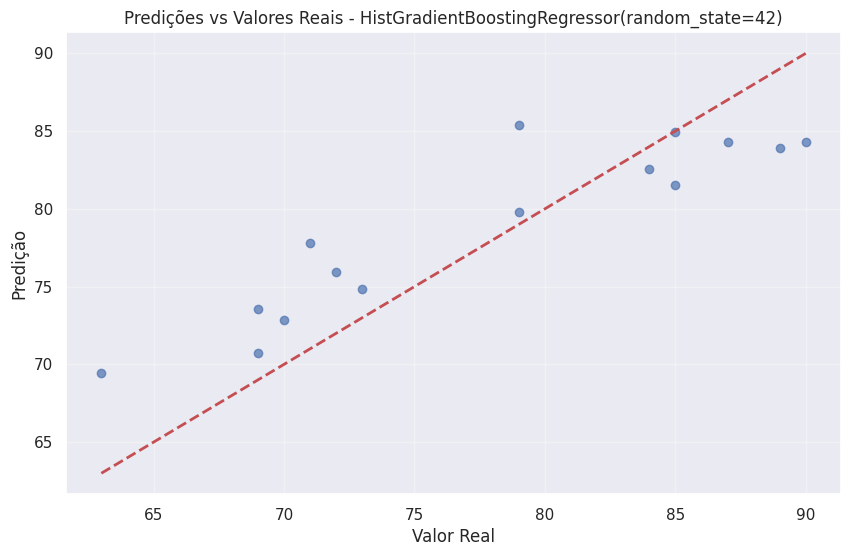

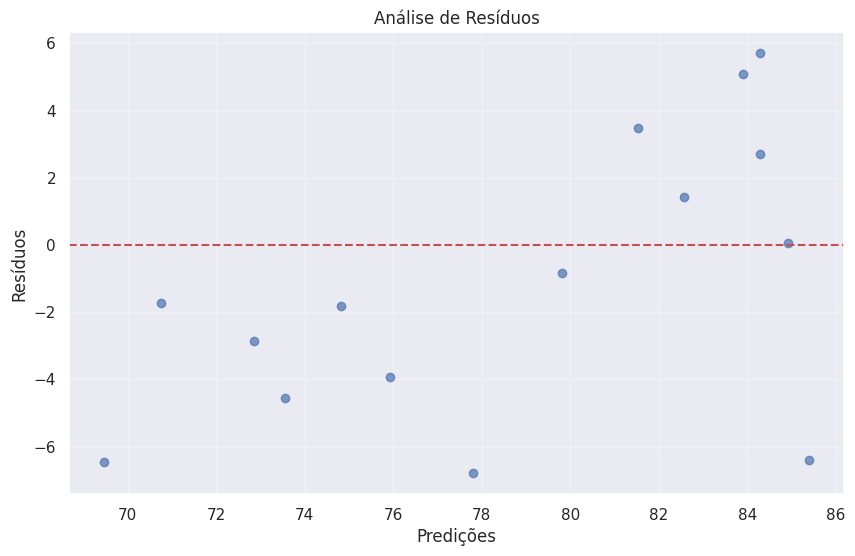

In [19]:
# Gráfico de dispersão: Previsões vs Valores Reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_hgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Predição')
plt.title(f'Predições vs Valores Reais - {hgb_model}')
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de resíduos
residuals = y_test - y_pred_hgb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_hgb, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predições')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.grid(True, alpha=0.3)
plt.show()

In [20]:
def predict_sono_quality(model, features_dict):
    """Função para fazer previsões com novo dados"""
    # Converter para DataFrame
    input_df = pd.DataFrame([features_dict])
    
    # Fazer previsão
    prediction = model.predict(input_df)[0]
    
    print(f"Previsão de pontuação de sono: {prediction:.1f}/100")
    return prediction

/tmp/ipykernel_38312/2133540461.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x="importance", y="feature", palette=colors)


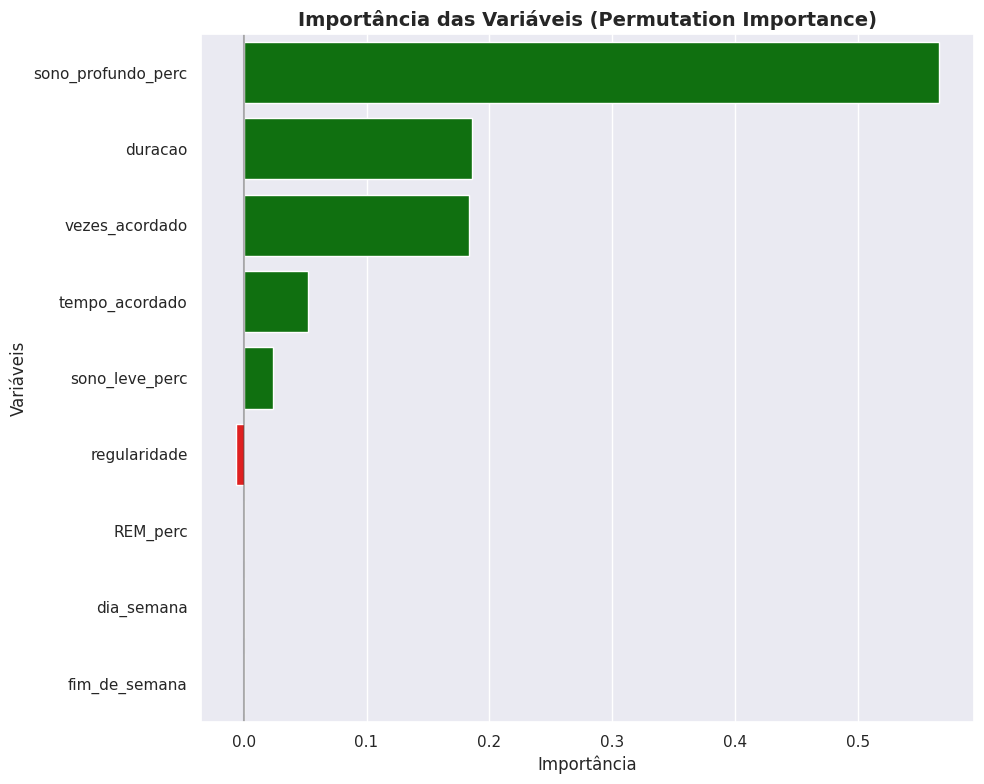

In [23]:
from sklearn.inspection import permutation_importance

# Calcula permutation importance
result = permutation_importance(
    hgb_model, X_test, y_test, n_repeats=10, random_state=42
)

importances = result.importances_mean

# Cria DataFrame com importâncias
feat_imp = pd.DataFrame({
    "feature": num_cols,
    "importance": importances
}).sort_values("importance", key=abs, ascending=False)

# Limita às 15 features mais importantes
feat_imp = feat_imp.head(15)

# Cria o gráfico
plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in feat_imp['importance']]

sns.barplot(data=feat_imp, x="importance", y="feature", palette=colors)
plt.title("Importância das Variáveis (Permutation Importance)", fontsize=14, fontweight='bold')
plt.xlabel("Importância", fontsize=12)
plt.ylabel("Variáveis", fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()